In [1]:
# Packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz

In [2]:
# Read in the movie metadata
data = pd.read_csv("movie_metadata.csv");

# Use only rows with no data missing
data = data.dropna();

# Use only numeric data
data = data.select_dtypes(include=[np.number])

# Separate gross from data
labels = data['gross'];
data = data.drop(columns=['gross']);

data = data.values;

In [4]:
#Constants
minLoss = 1e-5; # minimum loss
bestCLF = None; # best classifier
bestI = 0; # best iteration

#Lists
depth = []; # depth of tree 
allCLFs = []; # all the classifiers
r2 = []; # All the coefficients of determinations (R^2)

for i in range(2,31):
    # set the classifier at each depth i
    clf = DecisionTreeRegressor(max_depth=i);
    
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=data, y=labels, cv=7, n_jobs=4);
    
    # Adjust the minimum loss, set the best classifier, and best iteration
    if scores.mean() < minLoss:
        minLoss = scores.mean();
        bestCLF = clf;
        bestI = i;
    
    # Split the training and testing data up 
    xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.1);
    clf.fit(xtrain, ytrain);
    r2.append(clf.score(xtest, ytest));
    
    allCLFs.append(clf);
    depth.append(scores.mean());

30


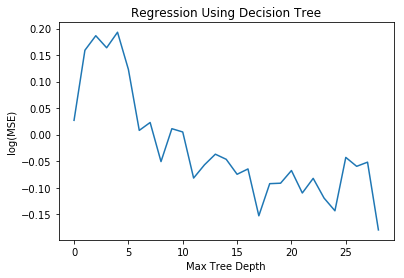

In [5]:
plt.plot(depth);
plt.xlabel('Max Tree Depth');
plt.ylabel('log(MSE)');
plt.title('Regression Using Decision Tree');

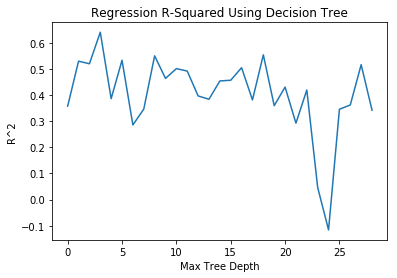

In [6]:
plt.plot(r2);
plt.xlabel('Max Tree Depth');
plt.ylabel('R^2');
plt.title('Regression R-Squared Using Decision Tree');

In [7]:
# To visualize the Decision Tree
# Note: it is extremely large, so it will take time to load
 
bestCLF.fit(data, labels);
dot_data1 = tree.export_graphviz(bestCLF, out_file='DecisionTreeRegressor.dot')
#graph = graphviz.Source(dot_data1) #uncomment to visualize tree

allCLFs[9].fit(data, labels);
dot_data2 = tree.export_graphviz(allCLFs[9], out_file='DecisionTreeRegressor_simple.dot')
#graph = graphviz.Source(dot_data2) #uncomment to visualize tree